LOGISTIC REGRESSION


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)


In [2]:
bank_data=pd.read_csv("D:\demonic head\\banking_stuffs.csv",header=0)
bank_data=bank_data.dropna()
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
bank_data['education']=np.where(bank_data['education']=='basic.9y','Basic',bank_data['education'])
bank_data['education']=np.where(bank_data['education']=='basic.6y','Basic',bank_data['education'])
bank_data['education']=np.where(bank_data['education']=='basic.4y','Basic',bank_data['education'])

In [4]:
bank_data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [5]:
bank_data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

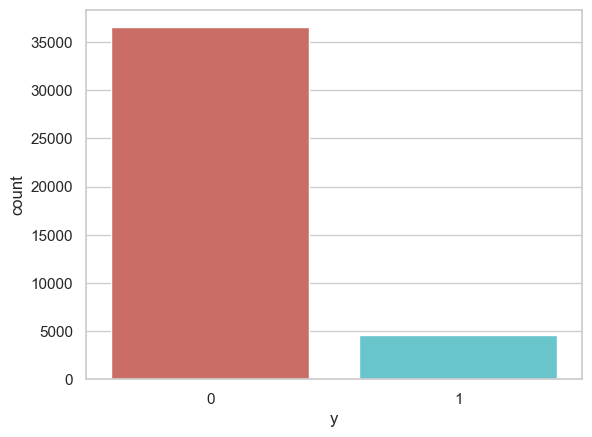

In [6]:
sns.countplot(x='y',data=bank_data,palette='hls')
plt.show()

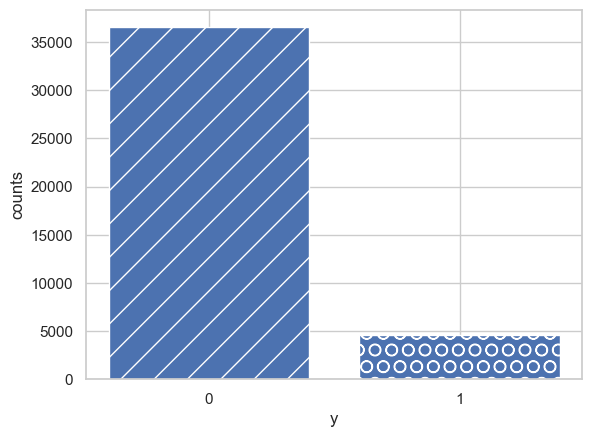

In [7]:
grx=plt.bar([0,1],bank_data['y'].value_counts())
plt.xlabel('y')
plt.ylabel('counts')
plt.xticks([0,1])
patterns=['/','O']
for bar in grx:
    bar.set_hatch(patterns.pop(0))
plt.show()    

In [8]:
yaya=len(bank_data[bank_data['y']==1])
noo=len(bank_data[bank_data['y']==0])
per_sub=(yaya/(yaya+noo))*100
per_nosub=(noo/(yaya+noo))*100
print("sub=",per_sub)
print("nosub=",per_nosub)

sub= 11.265417111780131
nosub= 88.73458288821988


In [9]:
bank_data.groupby('y')['age'].mean()

y
0    39.911185
1    40.913147
Name: age, dtype: float64

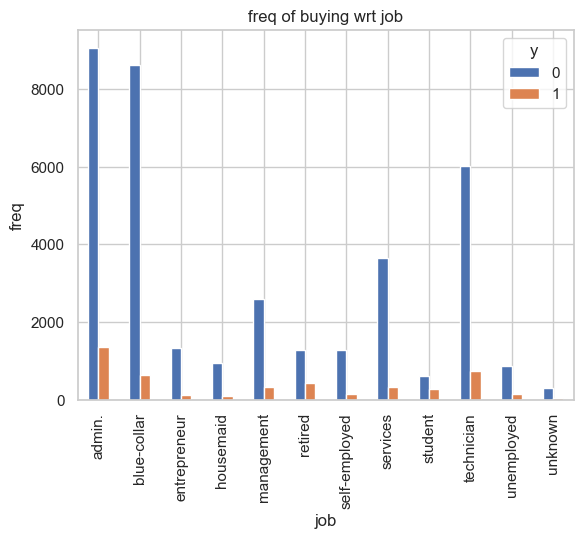

In [10]:
%matplotlib inline
pd.crosstab(bank_data['job'],bank_data['y']).plot(kind='bar')
plt.title("freq of buying wrt job")
plt.xlabel('job')
plt.ylabel('freq')
plt.show()

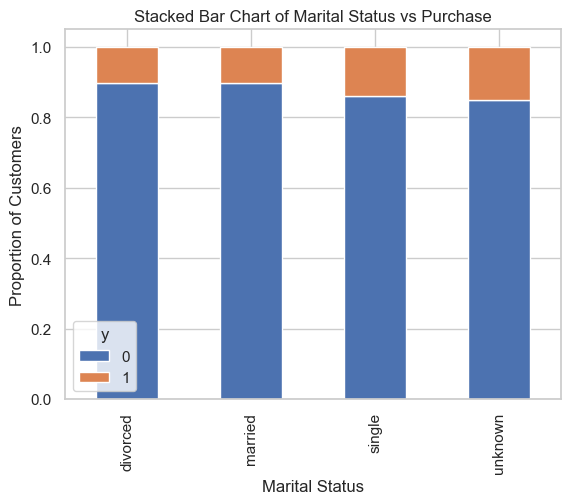

In [11]:
table=pd.crosstab(bank_data['marital'],bank_data['y'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

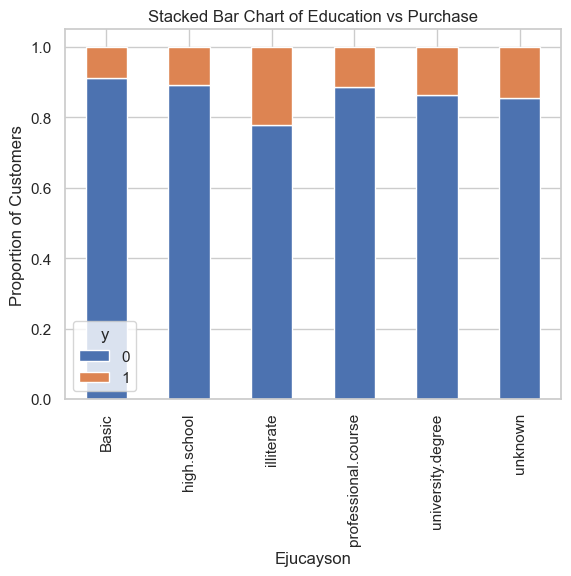

In [12]:
table=pd.crosstab(bank_data['education'],bank_data['y'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Ejucayson')
plt.ylabel('Proportion of Customers')
plt.show()

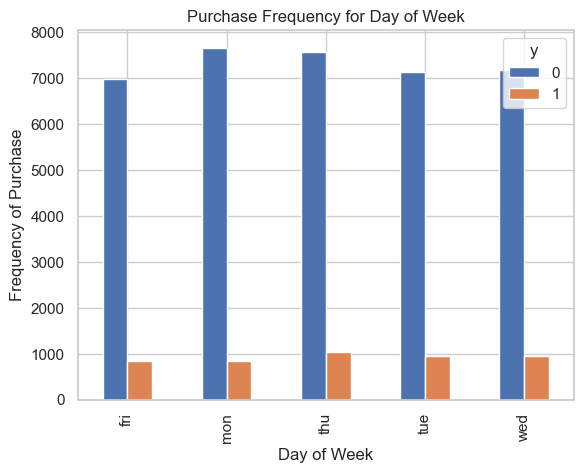

In [13]:
pd.crosstab(bank_data['day_of_week'],bank_data['y']).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()

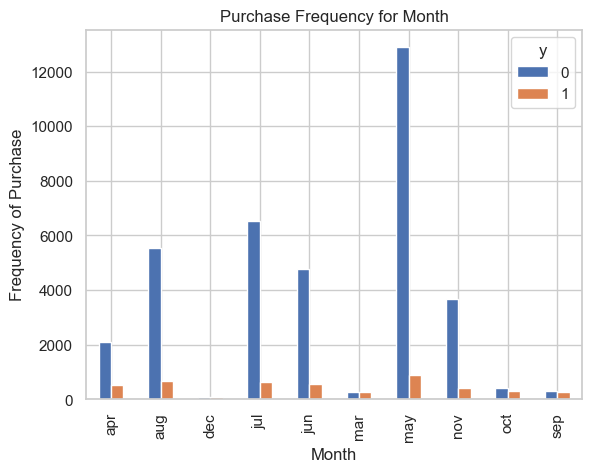

In [14]:
pd.crosstab(bank_data['month'],bank_data['y']).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

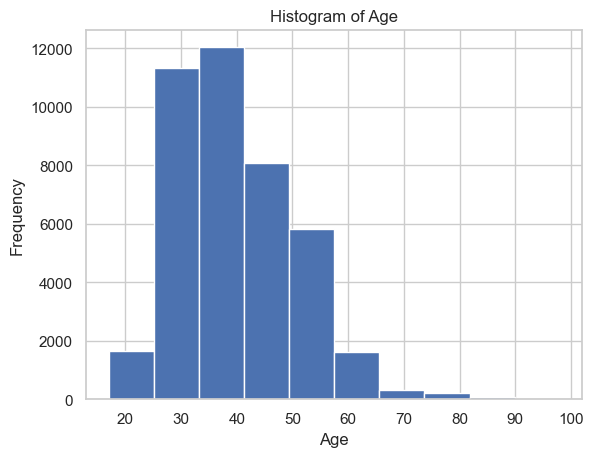

In [15]:
bank_data['age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

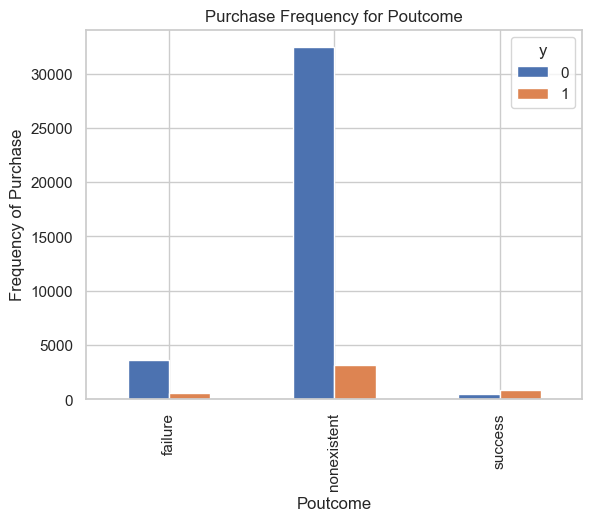

In [16]:
pd.crosstab(bank_data['poutcome'],bank_data['y']).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

DUMMY VARS AND OVER SAMPLING USING SMOTE

In [17]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(bank_data[var],prefix=var)
    data1=bank_data.join(cat_list)
    bank_data=data1

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=bank_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [18]:
data_final=bank_data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

SMOTE

In [19]:
X=data_final.loc[:,data_final.columns!='y']
Y=data_final.loc[:,data_final.columns=='y']
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
columns=X_train.columns
os_data_X,os_data_Y=os.fit_resample(X_train,Y_train)
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
print("length of oversampled data is",len(os_data_X))
print("Number of subs in oversampled",len(os_data_Y[os_data_Y['y']==1]))
print("Number of notsubs in oversampled",len(os_data_Y[os_data_Y['y']==0]))
print("proportion of subs in oversampled ",len(os_data_Y[os_data_Y['y']==1])/len(os_data_X))
print("proportion of notsubs in oversampled ",len(os_data_Y[os_data_Y['y']==0])/len(os_data_X))

length of oversampled data is 51248
Number of subs in oversampled 25624
Number of notsubs in oversampled 25624
proportion of subs in oversampled  0.5
proportion of notsubs in oversampled  0.5


RFE

In [22]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select=20)
rfe=rfe.fit(os_data_X,os_data_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

d:\demonic head\stuff\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\demonic head\stuff\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[False False False False False False False False False False False False
 False False False  True False False False False False False  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True False False False False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[35 38 34 39 31 33 32 40 29 37  5 12 10  9  7  1  6 11  2  8  3  4  1  1
  1  1  1  1 41  1  1  1  1  1 42  1  1  1 15 14 16 17 18 23 27 20 25 24
 19 26 28 21 22  1  1  1  1  1 36 30 13]


In [23]:
colz=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success']
X=os_data_X[colz]
y=os_data_Y['y']

IMPLEMENTATION

In [46]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.435875
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.371     
Date:                 2024-07-05 21:13  AIC:               44715.4479
No. Observations:     51248             BIC:               44892.3365
Df Model:             19                Log-Likelihood:    -22338.   
Df Residuals:         51228             LL-Null:           -35522.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.9413   0.0104 -90.2770 0.0000 -0.9617 -0.9208
job_blue-collar 

In [48]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_Y['y']
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.445793
         Iterations 7
                           Results: Logit
Model:                Logit             Method:            MLE       
Dependent Variable:   y                 Pseudo R-squared:  0.357     
Date:                 2024-07-05 21:14  AIC:               45724.0183
No. Observations:     51248             BIC:               45865.5292
Df Model:             15                Log-Likelihood:    -22846.   
Df Residuals:         51232             LL-Null:           -35522.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.7904   0.0080 -99.2255 0.0000 -0.8060 -0.7748
job_blue-collar 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

d:\demonic head\stuff\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [52]:
from sklearn.metrics import confusion_matrix
cnf_mat=confusion_matrix(y_test,y_pred)
print(cnf_mat)

[[6953  813]
 [1961 5648]]


In [53]:
print((6953+5648)/(6953+5648+813+1961))

0.8195772357723577


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      7766
           1       0.87      0.74      0.80      7609

    accuracy                           0.82     15375
   macro avg       0.83      0.82      0.82     15375
weighted avg       0.83      0.82      0.82     15375



ROC Classifier

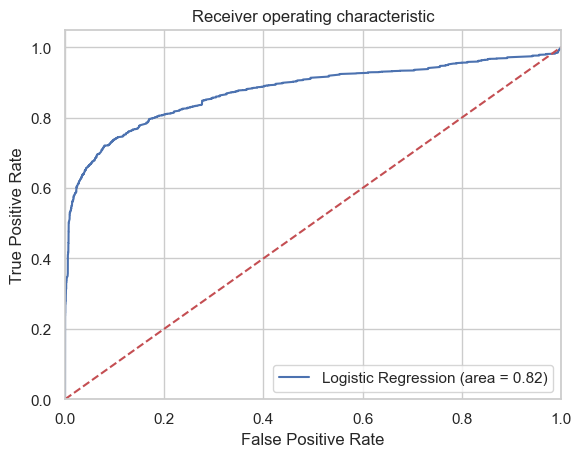

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

DONE